# Typical Time History of the Electricity Production at Abbott Power Plant

Please see the ``README`` for instructions about accessing the data (UIUC Grid Data is currently not cleared for publication). 

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../../data/'
fy15 = read_csv(path+"2015_abbott_generation.csv",  
                    parse_dates=True, 
                    index_col = ['date'])
fy15 = fy15.rename(columns={"Value (KW)":"kw", 
                            "eDNA Status as String":"status"})

fy16 = read_csv(path+"2016_abbott_generation.csv",  
                    parse_dates=True, 
                    index_col = ['date'])
fy16 = fy16.rename(columns={"Value (KW)":"kw", 
                            "eDNA Status as String":"status"})

fy17 = read_csv(path+"2017_abbott_generation.csv",  
                    parse_dates=True, 
                    index_col = ['date'])
fy17 = fy17.rename(columns={"Value (KW)":"kw", 
                            "eDNA Status as String":"status"})

fy18 = read_csv(path+"2018_abbott_generation.csv", 
                    parse_dates=True, 
                    index_col = ['date'])
fy18 = fy18.rename(columns={"Value (KW)":"kw", 
                            "eDNA Status as String":"status"})

fy19 = read_csv(path+"2019_abbott_generation.csv",  
                    parse_dates=True, 
                    index_col = ['date'])
fy19 = fy19.rename(columns={"Value (KW)":"kw", 
                            "eDNA Status as String":"status"})

In [3]:
frames = [fy15, fy16, fy17, fy18, fy19]
time_series = pd.concat(frames)
# time_series.time = time_series.index
time_series

,kw,status
date,,
2014-07-01 00:00:00,21580.0,OK
2014-07-01 01:00:00,21626.0,OK
2014-07-01 02:00:00,21651.0,OK
2014-07-01 03:00:00,21599.0,OK
2014-07-01 04:00:00,21660.0,OK
...,...,...
2019-06-30 19:00:00,30813.0,OK
2019-06-30 20:00:00,30838.0,OK
2019-06-30 21:00:00,30731.0,OK


In [4]:
mask = time_series['status'] == 'UNRELIABLE'
time_series[mask]

,kw,status
date,,
2014-10-31 11:00:00,38982.0,UNRELIABLE
2014-10-31 12:00:00,38982.0,UNRELIABLE
2014-10-31 13:00:00,38982.0,UNRELIABLE
2014-10-31 14:00:00,38982.0,UNRELIABLE
2014-10-31 15:00:00,38982.0,UNRELIABLE
...,...,...
2014-11-03 11:00:00,38982.0,UNRELIABLE
2014-11-03 12:00:00,38982.0,UNRELIABLE
2014-11-03 13:00:00,38982.0,UNRELIABLE


/home/dotson/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


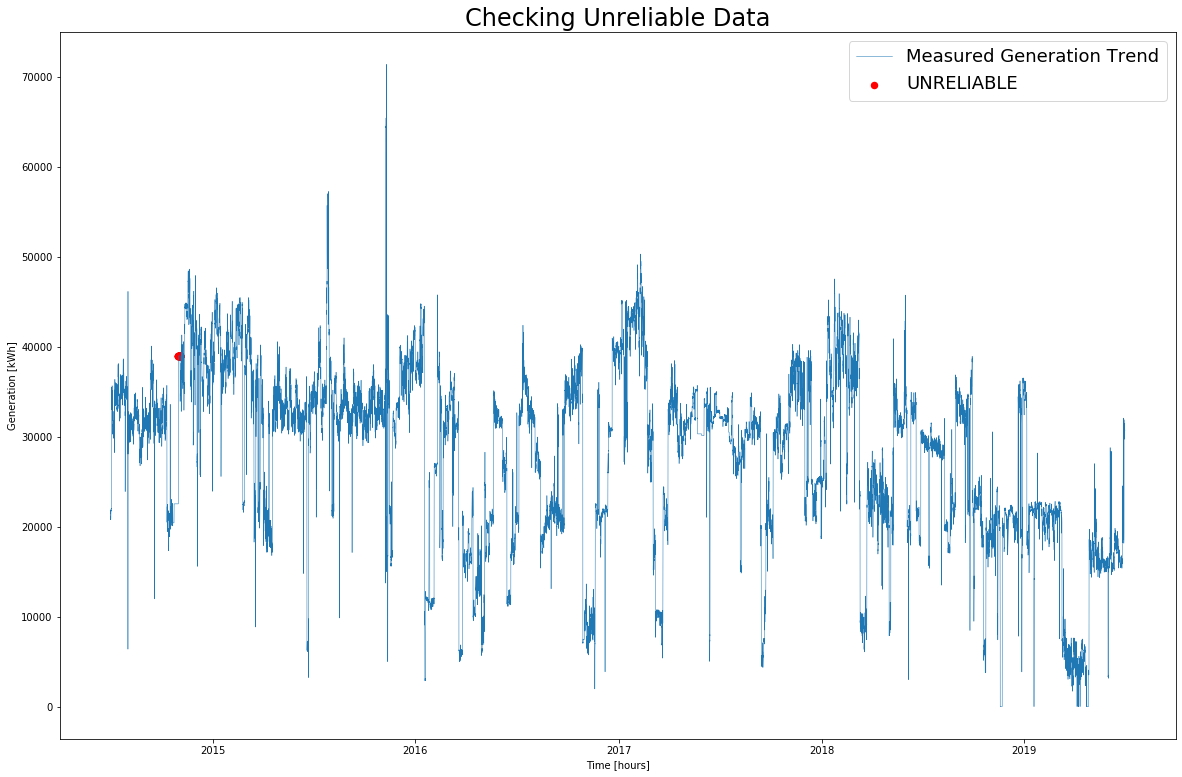

In [5]:
time_series_hours = time_series.copy()
time_series_hours['time'] = time_series_hours.index
time_series_hours
time_series_hours_unreliable = time_series_hours[mask]

fig = plt.figure(figsize=(20,13), facecolor='w')
trend = plt.plot(time_series_hours['time'], time_series_hours['kw'], lw=0.5, label="Measured Generation Trend")

legend = True
for hour, power in zip(list(time_series_hours_unreliable['time'].values), 
                       list(time_series_hours_unreliable['kw'].values)):
  if legend:
    # I only want it to show up on the legend once
    plt.scatter(hour, power, color='r',marker='o', linewidths=1.5,label='UNRELIABLE')
    legend = False
  else:
    plt.scatter(hour, power, color='r',marker='o', linewidths=1.5)



plt.legend(fontsize=18)
plt.title('Checking Unreliable Data', fontsize=24)
plt.xlabel('Time [hours]')
plt.ylabel('Generation [kWh]')
plt.show()

In [6]:
%%capture

grouped = time_series.groupby(time_series.index.year)

df15 = grouped.get_group(2015)
df16 = grouped.get_group(2016)[:8760] # must be same length as other years
df17 = grouped.get_group(2017)
df18 = grouped.get_group(2018)

df15.reset_index(inplace=True)
df16.reset_index(inplace=True)
df18.reset_index(inplace=True)
df17.reset_index(inplace=True)

df18['time'] = df18.index
df17['time'] = df17.index
df16['time'] = df16.index
df15['time'] = df15.index

df18 = df18[['time','kw']]
df17 = df17[['time','kw']]
df16 = df16[['time','kw']]
df15 = df15[['time','kw']]

In [7]:
df15

,time,kw
0,0,36303.0
1,1,36798.0
2,2,36712.0
3,3,36639.0
4,4,36656.0
...,...,...
8755,8755,36737.0
8756,8756,36786.0
8757,8757,36903.0
8758,8758,36788.0


In [8]:
# writes the header file for RAVEN
fname = 'annual_generation201'
keys = [fname + str(i) + '.csv' for i in range(5,9,1)]
header_file = pd.DataFrame({'scaling':np.zeros(len(keys), dtype=np.int8), 'filename':keys})
header_file.to_csv(path+'annual_generation_H.csv')
print(keys)

['annual_generation2015.csv', 'annual_generation2016.csv', 'annual_generation2017.csv', 'annual_generation2018.csv']


In [9]:
df15.to_csv(path+'annual_generation2015.csv')
df16.to_csv(path+'annual_generation2016.csv')
df17.to_csv(path+'annual_generation2017.csv')
df18.to_csv(path+'annual_generation2018.csv')

In [10]:
!~/Research/raven/raven_framework ~/Research/2020-dotson-optimal-sizing/inputfiles/typical_generation.xml

CONDA
raven_libraries          /home/dotson/anaconda3/envs/raven_libraries
Running RAVEN in "opt" mode.
/home/dotson/Research/raven/framework/utils/utils.py:579: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp, os.path
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/statsmodels/base/wrapper.py:100: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  defaults=argspec[3])
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/google/protobuf/descriptor.py:47: DeprecationWarning: Using or importing the ABCs from 'colle

(    0.06 sec) PostProcessor            : DEBUG           -> InterfacedPostProcessor Post-Processor typicalHistory : start to run
/home/dotson/Research/raven/framework/PostProcessorFunctions/TypicalHistoryFromHistorySet.py:271: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  (counts, _) = np.histogram(data,bins=binEdgesIn,normed=True)
/home/dotson/Research/raven/framework/PostProcessorFunctions/TypicalHistoryFromHistorySet.py:271: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produc

(    0.21 sec) STEP IOCOMBINED          : Message         -> ***       Run finished        ***
(    0.21 sec) STEP IOCOMBINED          : Message         -> ***     Closing the step      ***
(    0.21 sec) STEP IOCOMBINED          : Message         -> ***        Step closed        ***
(    0.21 sec) SIMULATION               : Message         -> -- End step write of type: IOStep                              --

--------------------------------------------------
There were 1 warnings during the simulation run:
(1 time) DataObject._convertToDict can be a slow operation and should be avoided where possible!
--------------------------------------------------
(    0.21 sec) SIMULATION               : Message         -> Run complete!


In [11]:
typical_demand = pd.read_csv(path+"TypicalGeneration_0.csv")

typical_demand['date'] = pd.date_range(start='1/1/2018', end='1/1/2019', freq='H')[:8760]

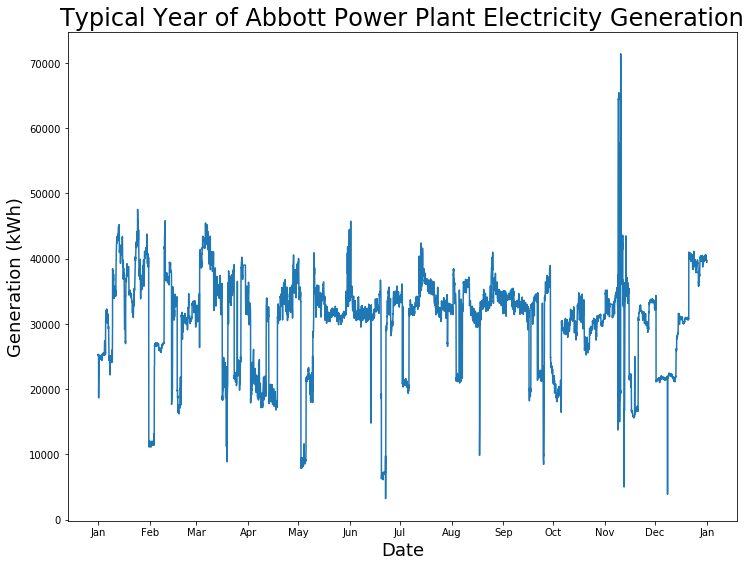

In [12]:
import matplotlib.dates as mdates


# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

fig = plt.figure(figsize=(12,9), edgecolor='k', facecolor='w')
plt.plot(typical_demand.date, typical_demand.kw)
plt.title('Typical Year of Abbott Power Plant Electricity Generation', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Generation (kWh)',fontsize=18)

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()

In [13]:
!~/Research/raven/raven_framework ~/Research/2020-dotson-optimal-sizing/inputfiles/generation_arma.xml

CONDA
raven_libraries          /home/dotson/anaconda3/envs/raven_libraries
Running RAVEN in "opt" mode.
/home/dotson/Research/raven/framework/utils/utils.py:579: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp, os.path
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/statsmodels/base/wrapper.py:100: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  defaults=argspec[3])
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/google/protobuf/descriptor.py:47: DeprecationWarning: Using or importing the ABCs from 'colle

(    0.05 sec) OUTSTREAM MANAGER        : DEBUG           -> ------Reading Completed for:
(    0.05 sec) OUTSTREAM MANAGER        : DEBUG           ->        Class          : OutStreamPrint  from <class 'OutStreams.OutStreamManager.OutStreamManager'>
(    0.05 sec) OUTSTREAM MANAGER        : DEBUG           ->        Type           : OutStreamPrint
(    0.05 sec) OUTSTREAM MANAGER        : DEBUG           ->        Name           : romMeta
(    0.05 sec) OUTSTREAM MANAGER        : DEBUG           ->        Initialization Parameters:
(    0.05 sec) OUTSTREAM MANAGER        : DEBUG           ->        Global Class Type                 : OutStreamManager
(    0.05 sec) OUTSTREAM MANAGER        : DEBUG           ->        Specialized Class Type            : OutStreamPrint
(    0.05 sec) OUTSTREAM MANAGER        : DEBUG           ->        Overwrite output everytime called : True
(    0.05 sec) OUTSTREAM MANAGER        : DEBUG           ->        Source Name 0 :: romMeta
(    0.05 sec) OUTS

(    0.10 sec) ARMA                     : DEBUG           -> ... ... training "kw"...
(    5.10 sec) ARMA                     : DEBUG           -> ... ... finished training target "kw"
(    5.10 sec) STEP ROM TRAINER         : Message         -> ***       Run finished        ***
(    5.10 sec) STEP ROM TRAINER         : Message         -> ***     Closing the step      ***
(    5.10 sec) STEP ROM TRAINER         : Message         -> ***        Step closed        ***
(    5.10 sec) SIMULATION               : Message         -> -- End step trainARMA of type: RomTrainer                      --

(    5.10 sec) SIMULATION               : Message         -> -- Beginning step romMeta of type: IOStep                           --
(    5.10 sec) STEP IOCOMBINED          : Message         -> ***  Beginning initialization ***
(    5.10 sec) STEP IOCOMBINED          : DEBUG           -> jobHandler initialized
(    5.10 sec) STEP IOCOMBINED          : DEBUG           -> for the role Output the item o

(    7.23 sec) HistorySet               : DEBUG           -> Printing metadata XML: "generationHistories.xml"
(    7.23 sec) STEP IOCOMBINED          : Message         -> ***       Run finished        ***
(    7.23 sec) STEP IOCOMBINED          : Message         -> ***     Closing the step      ***
(    7.23 sec) STEP IOCOMBINED          : Message         -> ***        Step closed        ***
(    7.23 sec) SIMULATION               : Message         -> -- End step write of type: IOStep                              --

(    7.23 sec) SIMULATION               : Message         -> Run complete!


In [14]:
path = '../../data/'
synthetic_history = pd.read_csv(path+"generationHistories_2.csv")

Text(0.5, 1.0, 'Synthetic and Typical Generation Histories')

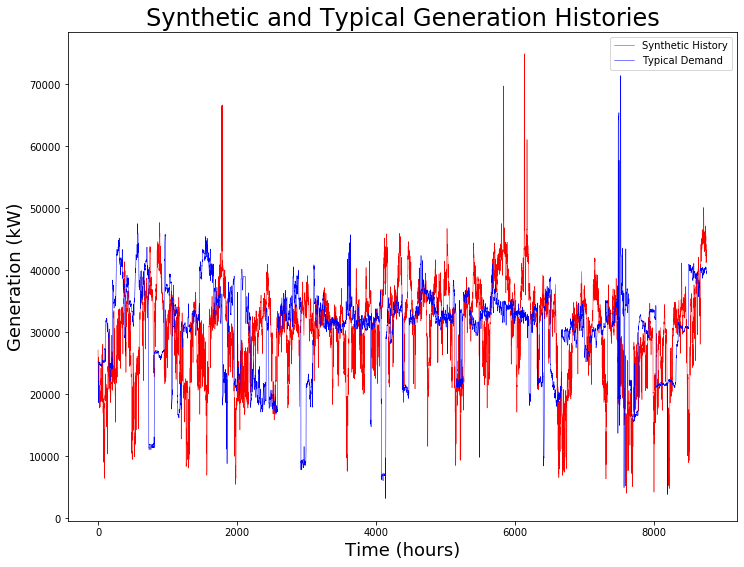

In [15]:
# plot synthetic history
fig = plt.figure(figsize=(12,9), edgecolor='k', facecolor='w')
plt.plot(synthetic_history['time'], synthetic_history['kw'], 
         color='r',lw = 0.5, label='Synthetic History')
plt.plot(typical_demand['time'], typical_demand['kw'], 
         color='b', lw=0.5, label='Typical Demand')
plt.ylabel("Generation (kW)", fontsize=18)
plt.xlabel("Time (hours)", fontsize=18)
plt.legend()
plt.title("Synthetic and Typical Generation Histories", fontsize=24)

In [16]:
print("Average typical generation is {}. Average synthetic generation is {}".format(typical_demand.kw.mean(), synthetic_history.kw.mean()))

Average typical generation is 30569.348284474927. Average synthetic generation is 30245.610270470144


## Why does the electricity production spike in November?

First, let's check that the data are actually aligned with the correct dates.

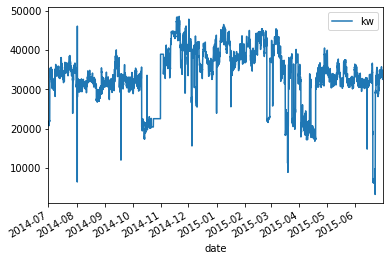

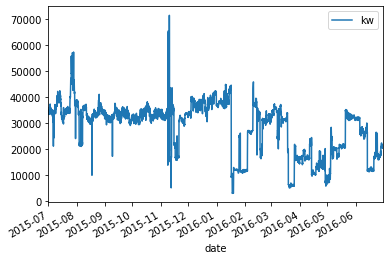

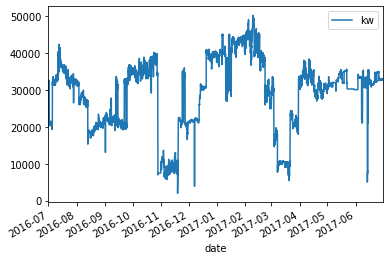

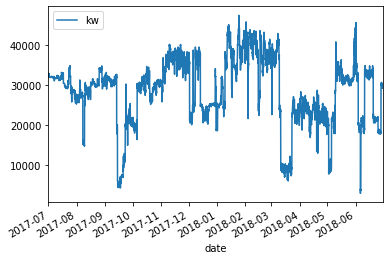

In [18]:
fy15.plot()
fy16.plot()
fy17.plot()
fy18.plot()

## Where is the peak?

The data plotted above are directly from the eDNA system. These are **_fiscal_** years.

How did we go from fiscal years to calendar years?

1. Combine all the data into a single pandas dataframe
2. Regroup the data by year. 
3. Initialize new dataframes for each _year_. 

Let's look at the year 2015 -- which is the calendar year where this spike occurs. 

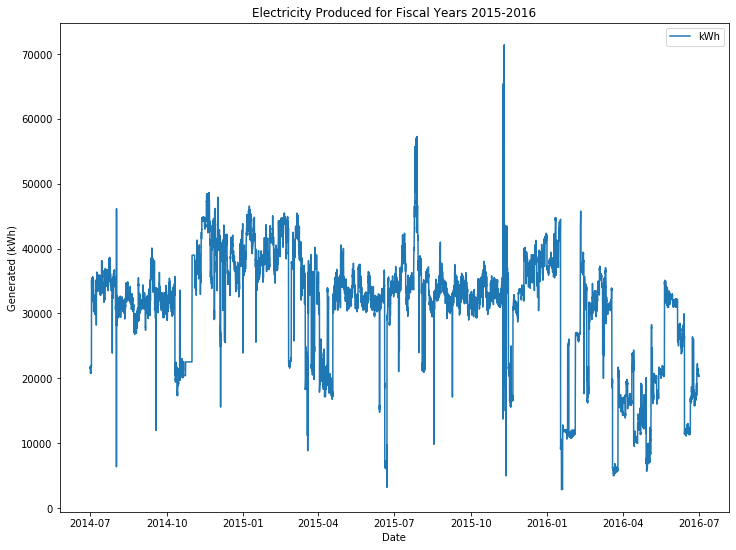

In [25]:
# combine the dataframes for FY15-FY16
frames2 = [fy15, fy16]
subset = pd.concat(frames2)

fig, ax = plt.subplots(1,1,figsize=(12,9), edgecolor='k', facecolor='w')
ax.plot(subset.index, subset.kw, label='kWh')
ax.set_title("Electricity Produced for Fiscal Years 2015-2016")
ax.set_ylabel("Generated (kWh)")
ax.set_xlabel("Date")
ax.legend()


## The spike actually occurs in November

But why? It should be clear that the data is properly aligned (despite the change in axis labels from month to hours in a year). 

Let's look at temperature data from 2015, perhaps there is some indication there... 

In [32]:
from data_funcs import to_float

weather = pd.read_csv(path+"willard_weather_data.csv", 
                      usecols=['DATE', 
                               'HourlyDryBulbTemperature', 
                               'HourlyPrecipitation'])
# convert to datetime
weather['DATE']=pd.to_datetime(weather['DATE'])

# rename columns
weather.rename(columns={'DATE':'time',
                        'HourlyDryBulbTemperature': 'temp',
                        'HourlyPrecipitation': 'prec'}, 
               inplace=True)

# fix broken data values
weather = to_float(weather, 'temp')
weather = to_float(weather, 'prec')

weather.temp = weather.temp.interp

,time,temp,prec
0,2010-01-01 00:53:00,7.0,0.0
1,2010-01-01 01:53:00,7.0,0.0
2,2010-01-01 02:53:00,6.0,0.0
3,2010-01-01 03:53:00,5.0,0.0
4,2010-01-01 04:53:00,4.0,0.0
...,...,...,...
114833,2019-09-09 20:53:00,72.0,0.0
114834,2019-09-09 21:53:00,72.0,0.0
114835,2019-09-09 22:53:00,71.0,0.0
114836,2019-09-09 23:53:00,71.0,0.0


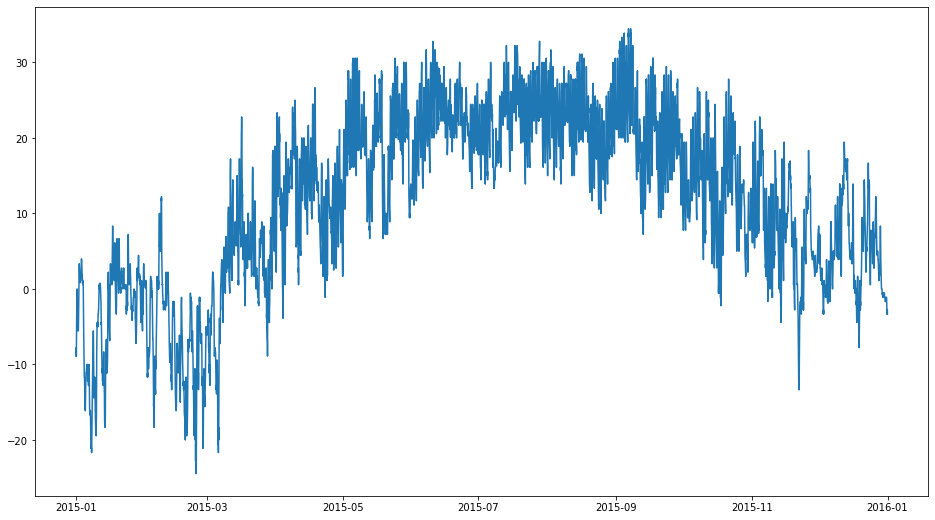

In [41]:
# get weather from 2015
grouped = weather.groupby(weather['time'].dt.year)
df15 = grouped.get_group(2015)

# Replaces the -999.99 values with None
interp15 = df15.replace(to_replace=-999.99, value=np.nan)

# Interpolates the data with method 'linear'
interp15 = interp15.interpolate(method='linear')

# convert to celcius
to_celcius = lambda x: (x-32)*5/9

interp15['temp'] = interp15['temp'].apply(to_celcius)

# get one measurement per hour
interp15.index = pd.to_datetime(interp15.time)
interp15 = interp15.resample('H').mean()

# interp15
fig = plt.figure(figsize=(16,9),facecolor='w',edgecolor='k')
plt.plot(interp15.index, interp15['temp'])

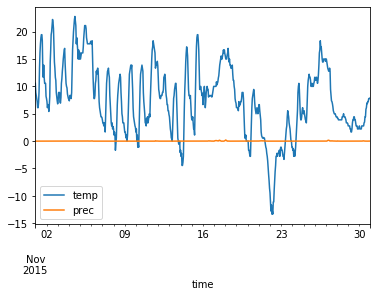

In [43]:
weather_months = interp15.groupby(interp15.index.month)
weather_november = weather_months.get_group(11)
weather_november.plot()

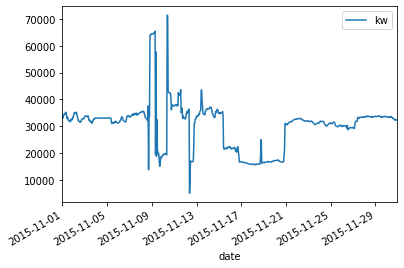

In [44]:
poweryears = subset.groupby(subset.index.year)
power_15 = poweryears.get_group(2015)

power_months = power_15.groupby(power_15.index.month)
power_november = power_months.get_group(11)

power_november.plot()

In [57]:
# create a new dataframe 

power = power_november.kw
temp = weather_november.temp

# kw is scaled down to show temp and power on the same graph.
november15 = pd.DataFrame({'kw':power/1000, 'temp':temp})
november15

,kw,temp
2015-11-01 00:00:00,33.124,10.555556
2015-11-01 01:00:00,33.303,8.888889
2015-11-01 01:00:00,32.981,8.888889
2015-11-01 02:00:00,33.552,8.333333
2015-11-01 03:00:00,34.354,7.777778
...,...,...
2015-11-30 19:00:00,32.323,7.222222
2015-11-30 20:00:00,32.450,7.777778
2015-11-30 21:00:00,32.277,7.777778
2015-11-30 22:00:00,32.284,7.777778


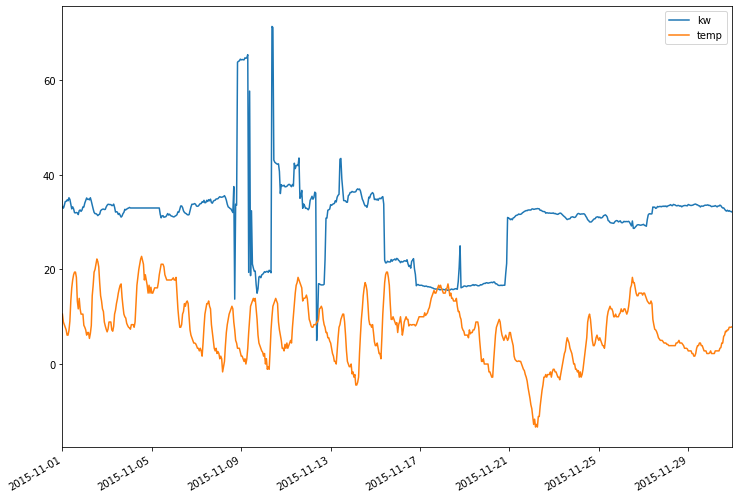

In [60]:
november15.plot(figsize=(12,9))

## It is clearly not due to a spike in temperature

Other possibilies: 
1. HIDRA was turned on for some experiments in Nov. 2015?
2. Blue Waters experienced a spike in jobs in Nov. 2015?

I can check (2) because I have data for that building. 

In [67]:
ncsa_fy15 = read_csv(path+"bluewaters_fy2015.csv", parse_dates=True, index_col="Date and Time")
ncsa_fy16 = read_csv(path+"bluewaters_fy2016.csv", parse_dates=True, index_col="Date and Time")

frames3 = [ncsa_fy15,ncsa_fy16]

bw_data = pd.concat(frames3)

bw_years = bw_data.groupby(bw_data.index.year)
bw15 = bw_years.get_group(2015)

bw_months = bw15.groupby(bw15.index.month)
bw_november = bw_months.get_group(11)

In [68]:
bw_november

,Value (KWH),eDNA Status as String,Usage
Date and Time,,,
2015-11-01 00:00:00,255560752,OK,10080
2015-11-01 01:00:00,255570736,OK,9984
2015-11-01 01:00:00,255580736,OK,10000
2015-11-01 02:00:00,255591088,OK,10352
2015-11-01 03:00:00,255601376,OK,10288
...,...,...,...
2015-11-30 19:00:00,263388768,OK,11728
2015-11-30 20:00:00,263400224,OK,11456
2015-11-30 21:00:00,263411040,OK,10816


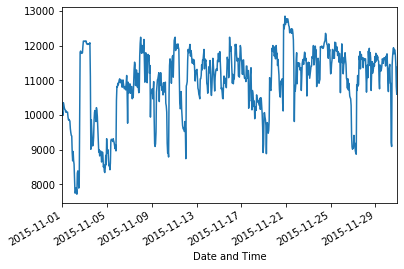

In [69]:
bw_usage = bw_november['Usage']
bw_usage.plot()

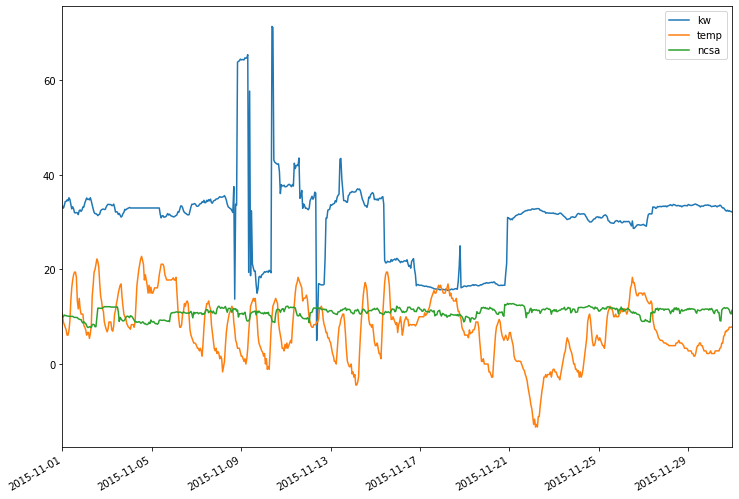

In [70]:
november15['ncsa'] = bw_november['Usage']/1000 # scale it down again

november15.plot(figsize=(12,9))

## It is clearly not due to a spike in Blue Waters jobs (which is pretty steady). 

Without asking F&S if there was anything special about that day, I'm not sure why the spike exists there. 